# MATH 210 Introduction to Mathematical Computing

## March 11, 2016

Today's Agenda:

1. Linear Algebra in SciPy
2. Linear Systems of ODEs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Linear Algebra in SciPy

SciPy's linear algebra package is `linalg` (see the [documentation](http://docs.scipy.org/doc/scipy/reference/linalg.html)). It has function for common linear algebra computations:

* Determinants
* Inverses
* Norm
* Solving Systems of Equations
* Eigenvalues and Eigenvectors

Let's begin by importing it as `la`.

In [2]:
import scipy.linalg as la

We will use NumPy arrays as matrices instead of using the `matrix` datatype. We will encounter fewer errors and misunderstandings if we stick with NumPy arrays.

Recall, when we multiply NumPy arrays, the operation is performed **elementwise**.

In [3]:
A = np.random.randint(-2,3,(2,2))
print(A)

[[-1  2]
 [ 0  2]]


In [4]:
B = np.random.randint(-2,3,(2,2))
print(B)

[[-2 -2]
 [ 0  2]]


In [5]:
A*B

array([[ 2, -4],
       [ 0,  4]])

If we want to use NumPy arrays as matrices and do matrix multiplication, then we use the NumPy function `np.dot`:

In [6]:
np.dot(A,B)

array([[2, 6],
       [0, 4]])

### Determinants

In [7]:
la.det(A)

-2.0

### Inverses

In [8]:
la.inv(A)

array([[-1. ,  1. ],
       [ 0. ,  0.5]])

### Norm

In [9]:
v = np.random.randint(-2,3,5)
print(v)

[-2  1  2 -1 -1]


In [10]:
la.norm(v)

3.3166247903553998

In [11]:
np.sqrt( sum( [ entry**2 for entry in v ] ) )

3.3166247903553998

### Solving Systems of Equations

In [12]:
A = np.random.randint(-3,4,(3,3))
b = np.random.randint(-3,4,(3,1))
print(A)
print(b)

[[ 0 -3 -3]
 [ 0 -3 -2]
 [ 3 -1  3]]
[[-1]
 [ 2]
 [-3]]


In [13]:
la.solve(A,b)

array([[-4.88888889],
       [-2.66666667],
       [ 3.        ]])

In [14]:
np.dot(la.inv(A),b)

array([[-4.88888889],
       [-2.66666667],
       [ 3.        ]])

### Eigenvalues and Eigenvectors

In [15]:
A = np.random.randint(-3,4,(3,3))
print(A)

[[ 3 -3  1]
 [ 2 -1 -2]
 [ 3  1  2]]


In [16]:
eigval, eigvec = la.eig(A)
print(eigval)
print(eigvec)

[ 4.42936433+0.j        -0.21468217+2.8028062j -0.21468217-2.8028062j]
[[ 0.63820308+0.j          0.27508756+0.40888497j  0.27508756-0.40888497j]
 [-0.04795046+0.j          0.67953544+0.j          0.67953544-0.j        ]
 [ 0.76837334+0.j          0.00826191-0.5434181j   0.00826191+0.5434181j ]]


In [17]:
np.dot(A,eigvec[:,0])

array([ 2.82683395+0.j, -0.21239006+0.j,  3.40340545+0.j])

In [18]:
eigval[0].real*eigvec[:,0]

array([ 2.82683395+0.j, -0.21239006+0.j,  3.40340545+0.j])

## 2. Linear Systems of ODEs

**Example.** Plot the solutions $y_1(t)$ and $y_2(t)$ for

\begin{align}
y_1' &= y_1 + 2y_2 \\
y_2' &= y_1 - y_2 \\
\end{align}

with $y_1(0) = 1$ and $y_2(0) = -1$.

In [19]:
A = np.array([[1,2],[1,-1]])
print(A)

[[ 1  2]
 [ 1 -1]]


In [20]:
eigval, eigvec = la.eig(A)
print(eigval)
print(eigvec)

[ 1.73205081+0.j -1.73205081+0.j]
[[ 0.9390708  -0.59069049]
 [ 0.34372377  0.80689822]]


In [21]:
def y1(t):
    return eigvec[0,0]*np.exp(eigval[0].real*t) + eigvec[0,1]*np.exp(eigval[1].real*t)

def y2(t):
    return eigvec[1,0]*np.exp(eigval[0].real*t) + eigvec[1,1]*np.exp(eigval[1].real*t)

In [22]:
t = np.linspace(0,3,100)
y1values = y1(t)
y2values = y2(t)

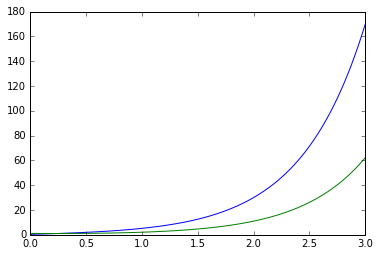

In [23]:
plt.plot(t,y1values,t,y2values)
plt.show()